# import lirbraries

In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use("ggplot")
pd.set_option('display.max_columns', 200)

# read the data

In [118]:
df = pd.read_csv("user_behavior_dataset.csv")

# Explore the data

In [120]:
df.shape

(700, 11)

In [121]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [122]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,700.0,350.500000,202.216880,1.0,175.75,350.5,525.25,700.0
App Usage Time (min/day),700.0,271.128571,177.199484,30.0,113.25,227.5,434.25,598.0
Screen On Time (hours/day),700.0,5.272714,3.068584,1.0,2.50,4.9,7.40,12.0
Battery Drain (mAh/day),700.0,1525.158571,819.136414,302.0,722.25,1502.5,2229.50,2993.0
Number of Apps Installed,700.0,50.681429,26.943324,10.0,26.00,49.0,74.00,99.0
Data Usage (MB/day),700.0,929.742857,640.451729,102.0,373.00,823.5,1341.00,2497.0
Age,700.0,38.482857,12.012916,18.0,28.00,38.0,49.00,59.0
User Behavior Class,700.0,2.990000,1.401476,1.0,2.00,3.0,4.00,5.0


In [123]:
df.nunique()

User ID                       700
Device Model                    5
Operating System                2
App Usage Time (min/day)      387
Screen On Time (hours/day)    108
Battery Drain (mAh/day)       628
Number of Apps Installed       86
Data Usage (MB/day)           585
Age                            42
Gender                          2
User Behavior Class             5
dtype: int64

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


### drop irrelevant columns

In [126]:
df.drop("User ID", axis = 1, inplace = True)

### duplicated

In [128]:
df.duplicated().sum()

0

### null values

In [130]:
df.isnull().sum()

Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

# heatmap corrolation

<Axes: >

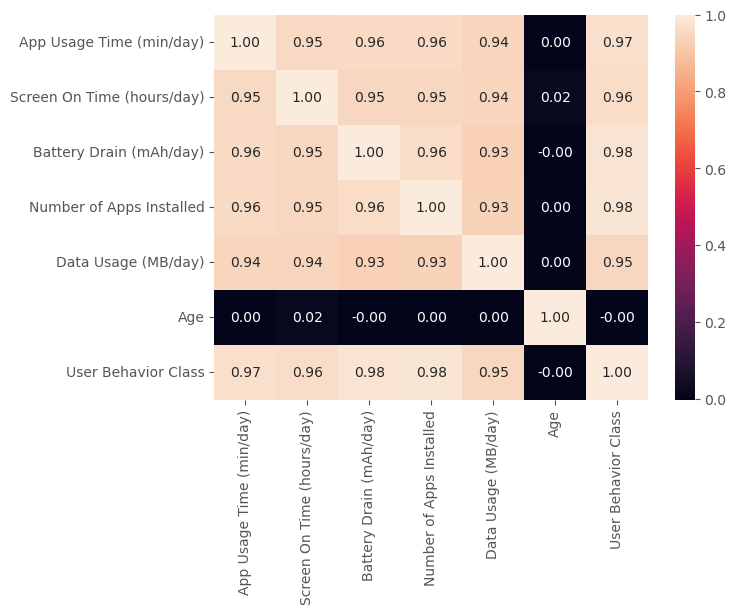

In [132]:
plt.figure(figsize = (7,5))
sns.heatmap(data = df.corr(numeric_only=True), annot = True, fmt=".2f")

In [133]:
# drop the weak corrolation 
df.drop("Age", axis = 1, inplace = True)
# i can also drop the columns that have a strong corrolation with the y and keep one of them

# vasualization

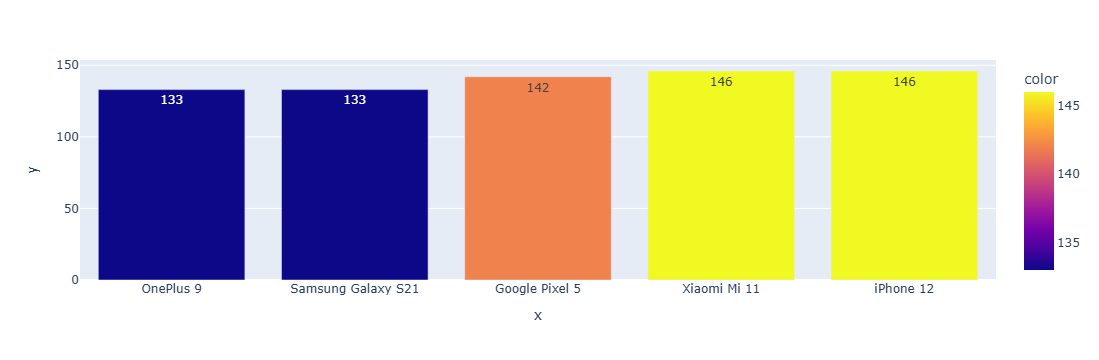

In [135]:

Device_Model = df["Device Model"].value_counts().sort_values()
fig = px.bar(df,
             x = Device_Model.index.astype("str"),
             y = Device_Model.values,
             text = Device_Model.values,
             color = Device_Model.values)

fig.show()

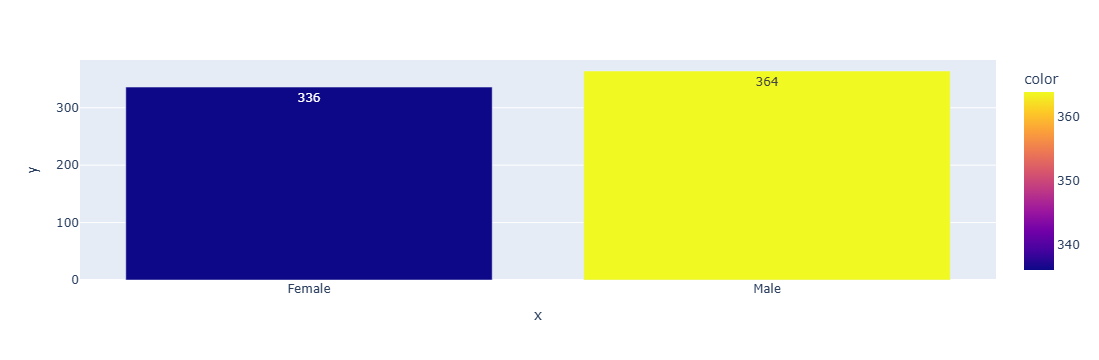

In [136]:
Gender = df["Gender"].value_counts().sort_values()
fig = px.bar(df,
             x = Gender.index.astype("str"),
             y = Gender.values,
             text = Gender.values,
             color = Gender.values)

fig.show()

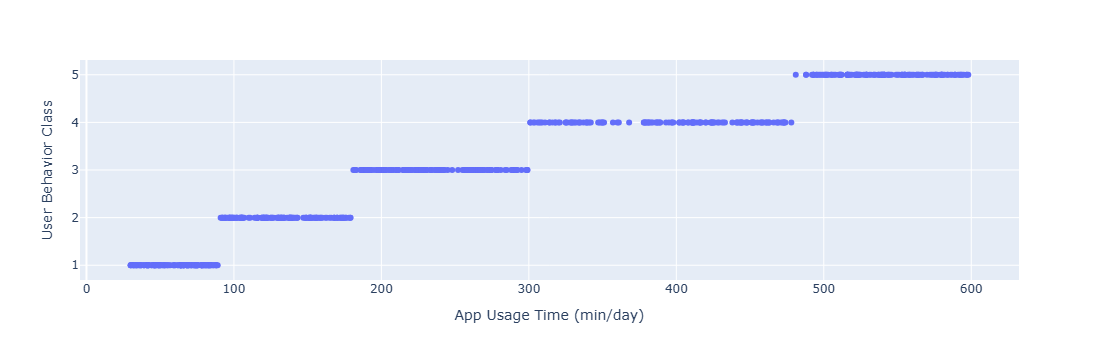

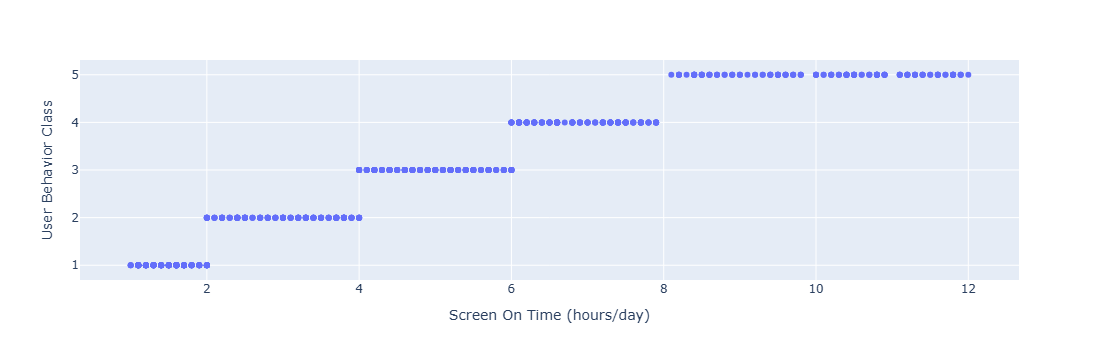

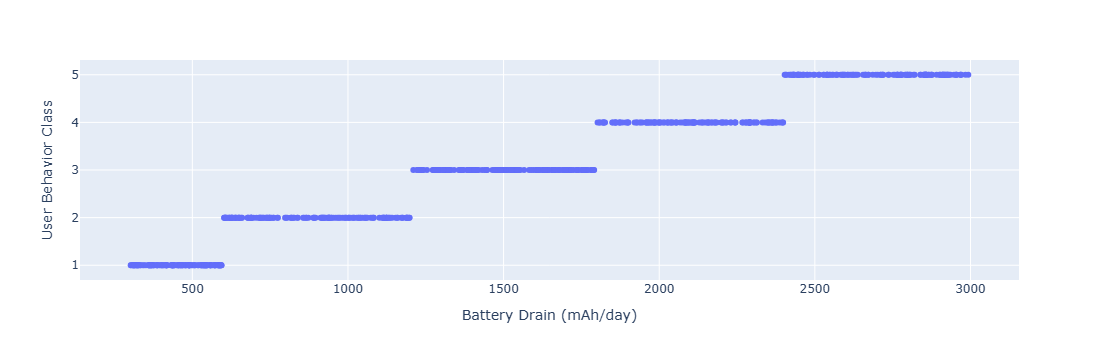

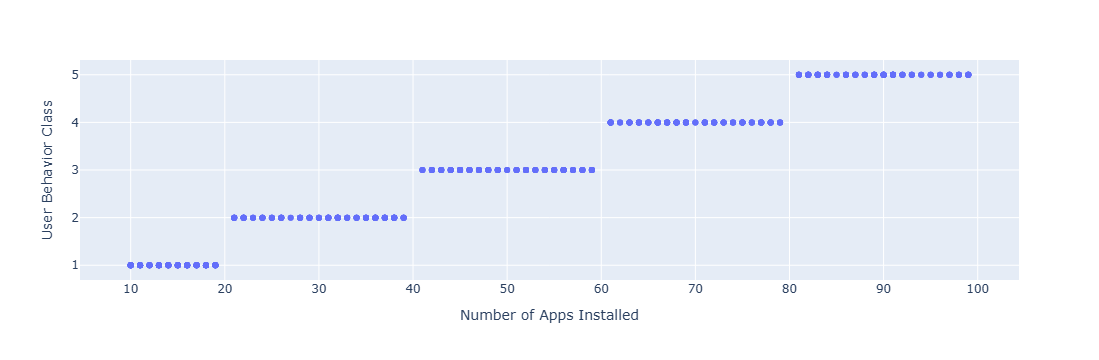

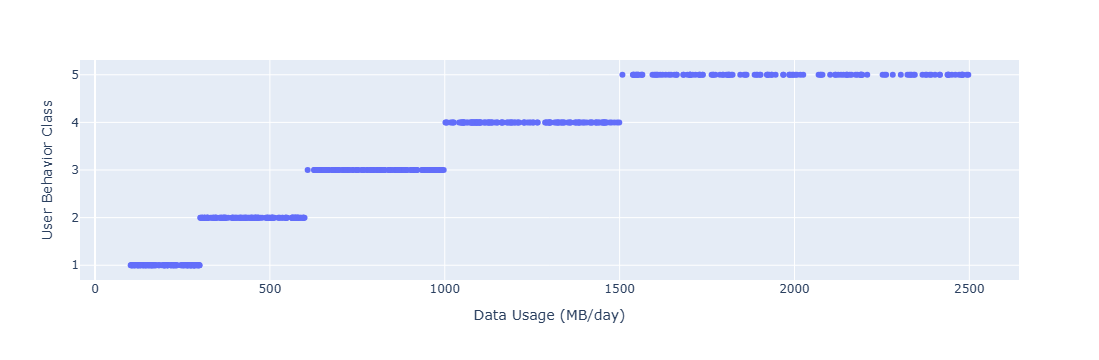

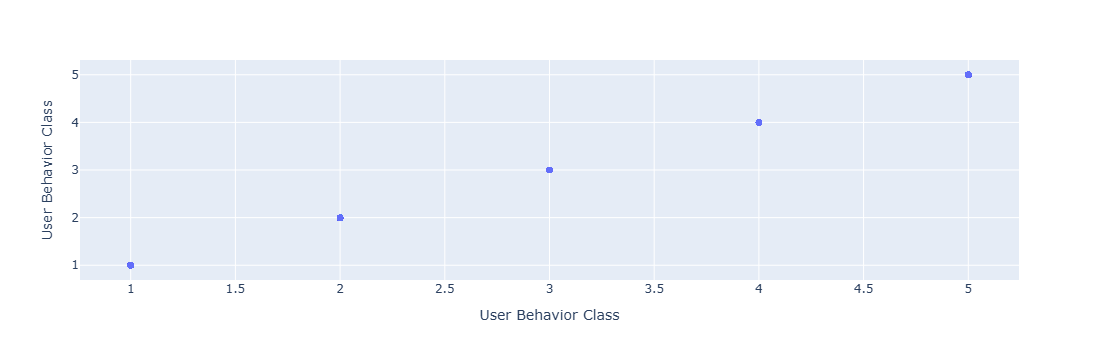

In [137]:
for i in df.select_dtypes(include = "number").columns:
    fig = px.scatter(df,
                 y = df['User Behavior Class'],
                 x = df[i])
    
    fig.show()

# outlires

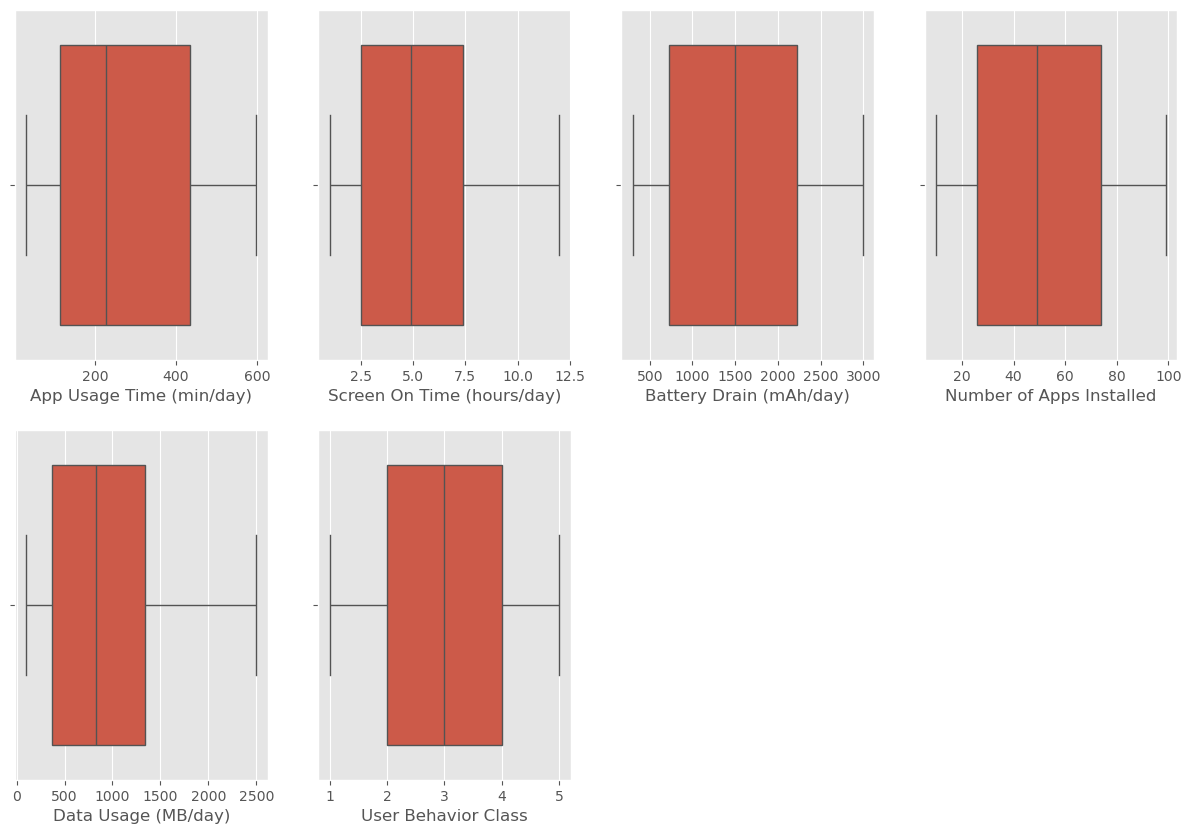

In [139]:
plt.figure(figsize = (15,10))
for i, col in enumerate(df.select_dtypes(include = "number").columns):
    plt.subplot(2,4,i+1)
    sns.boxplot(data = df[col],orient = "h")
    #plt.title(col)
plt.show()

# object issue

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Device Model                700 non-null    object 
 1   Operating System            700 non-null    object 
 2   App Usage Time (min/day)    700 non-null    int64  
 3   Screen On Time (hours/day)  700 non-null    float64
 4   Battery Drain (mAh/day)     700 non-null    int64  
 5   Number of Apps Installed    700 non-null    int64  
 6   Data Usage (MB/day)         700 non-null    int64  
 7   Gender                      700 non-null    object 
 8   User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 49.3+ KB


In [142]:
df.nunique()

Device Model                    5
Operating System                2
App Usage Time (min/day)      387
Screen On Time (hours/day)    108
Battery Drain (mAh/day)       628
Number of Apps Installed       86
Data Usage (MB/day)           585
Gender                          2
User Behavior Class             5
dtype: int64

### one hot encoder

In [144]:
encoding = df.select_dtypes(include = "object").columns
encoding

Index(['Device Model', 'Operating System', 'Gender'], dtype='object')

In [145]:
df = pd.get_dummies(data = df, columns = encoding, drop_first = True)
bool_columns = df.select_dtypes(include = "bool").columns
for i in bool_columns:
    df[i] = df[i].apply(lambda x : x * 1)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   App Usage Time (min/day)         700 non-null    int64  
 1   Screen On Time (hours/day)       700 non-null    float64
 2   Battery Drain (mAh/day)          700 non-null    int64  
 3   Number of Apps Installed         700 non-null    int64  
 4   Data Usage (MB/day)              700 non-null    int64  
 5   User Behavior Class              700 non-null    int64  
 6   Device Model_OnePlus 9           700 non-null    int64  
 7   Device Model_Samsung Galaxy S21  700 non-null    int64  
 8   Device Model_Xiaomi Mi 11        700 non-null    int64  
 9   Device Model_iPhone 12           700 non-null    int64  
 10  Operating System_iOS             700 non-null    int64  
 11  Gender_Male                      700 non-null    int64  
dtypes: float64(1), int64(1

#  split the data

In [168]:
x = df.drop("User Behavior Class", axis = 1)
y = df["User Behavior Class"]

# Standardization

In [171]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = MinMaxScaler()
x_sc = sc.fit_transform(x)

In [173]:
from sklearn.model_selection import train_test_split

In [175]:
X_train, X_test, y_train, y_test = train_test_split(x_sc, y, test_size=0.30, random_state=0, stratify=y)

# logistic regression

In [178]:
from sklearn.linear_model import LogisticRegression

In [184]:
lr = LogisticRegression(max_iter=100)

In [186]:
lr.fit(X_train, y_train)

LogisticRegression()

In [188]:
lr.score(X_train, y_train)

0.9775510204081632

In [190]:
lr.score(X_test, y_test)

0.9333333333333333

In [192]:
y_pred = lr.predict(X_test)

# Evaluate the model

In [201]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score
print(f"confusion_matrix \n{confusion_matrix(y_pred, y_test)}")
print("-------------------------------------------")
print(f"accuracy_score \n{accuracy_score(y_pred, y_test)}")
print("-------------------------------------------")
print(f"precision_score \n{precision_score(y_pred, y_test, average='micro')}")
print("-------------------------------------------")
print(f"recall_score \n{recall_score(y_pred, y_test, average='micro')}")
print("-------------------------------------------")
print(f"f1_score \n{f1_score(y_pred, y_test, average='micro')}")
print("-------------------------------------------")

confusion_matrix 
[[41  5  0  0  0]
 [ 0 39  7  0  0]
 [ 0  0 34  0  0]
 [ 0  0  2 41  0]
 [ 0  0  0  0 41]]
-------------------------------------------
accuracy_score 
0.9333333333333333
-------------------------------------------
precision_score 
0.9333333333333333
-------------------------------------------
recall_score 
0.9333333333333333
-------------------------------------------
f1_score 
0.9333333333333333
-------------------------------------------
